# Problem Statement : TITANIC SURVIVAL PREDICTION
                  We will use the classic Titanic dataset. The dataconsists of demographic and traveling information for 418 of the Titanic passengers, and the goal isto predict the survival of these passengers.This dataset contains information about general information and detail of each passengers.

# Importing Libraries 

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns

In [45]:
import matplotlib.pyplot as plt

In [73]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score , confusion_matrix
from sklearn.linear_model import LogisticRegression

# Reading Dataset

In [4]:
df = pd.read_csv('Downloads\\tested.csv')

In [9]:
df=pd.DataFrame(df)

# Exploratory Data Analysis[EDA]

In [10]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [12]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [13]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [15]:
df['Survived'].unique()

array([0, 1], dtype=int64)

In [16]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [17]:
df.shape

(418, 12)

In [18]:
df['Age'] = df['Age'].fillna(df['Age'].mean())

In [22]:
df['Fare'] = df['Fare'].fillna(df['Fare'].mean())

In [27]:
df.drop(columns=['Cabin'],inplace=True)
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [28]:
df.shape

(418, 11)

In [29]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [33]:
df['Embarked'].unique()      #bording stations of passengers

array(['Q', 'S', 'C'], dtype=object)

In [35]:
df['Embarked'] = df['Embarked'].replace(to_replace=['Q' , 'S', 'C'],value = [0, 1, 2])

In [37]:
df['Embarked'].tail()

413    1
414    2
415    1
416    1
417    2
Name: Embarked, dtype: int64

In [38]:
df['Sex'].unique()

array(['male', 'female'], dtype=object)

In [40]:
df['Sex'] = df['Sex'].replace(to_replace=['male' , 'female'] , value=[0,1])

In [41]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex              int64
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked         int64
dtype: object

In [43]:
df.drop(columns=['PassengerId','Name', 'Ticket'], inplace=True)

In [44]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,34.5,0,0,7.8292,0
1,1,3,1,47.0,1,0,7.0000,1
2,0,2,0,62.0,0,0,9.6875,0
3,0,3,0,27.0,0,0,8.6625,1
4,1,3,1,22.0,1,1,12.2875,1


# Data Visualization

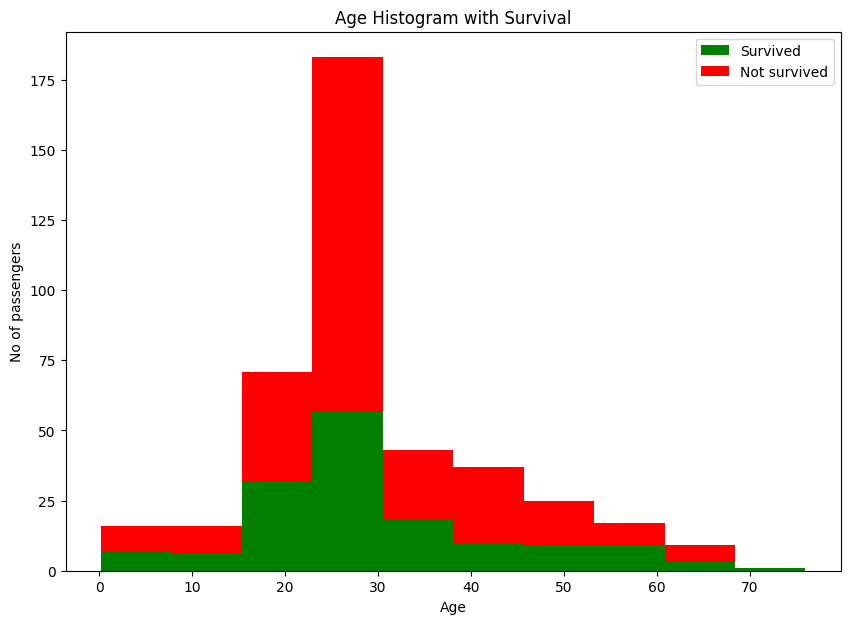

In [48]:
fig = plt.figure(figsize =(10, 7))
plt.hist([df[df['Survived']==1]['Age'], df[df['Survived']==0]['Age']],stacked=True, color = ['g','r'],label = ['Survived','Not survived'])
plt.title('Age Histogram with Survival')
plt.xlabel('Age')
plt.ylabel('No of passengers')
plt.legend()

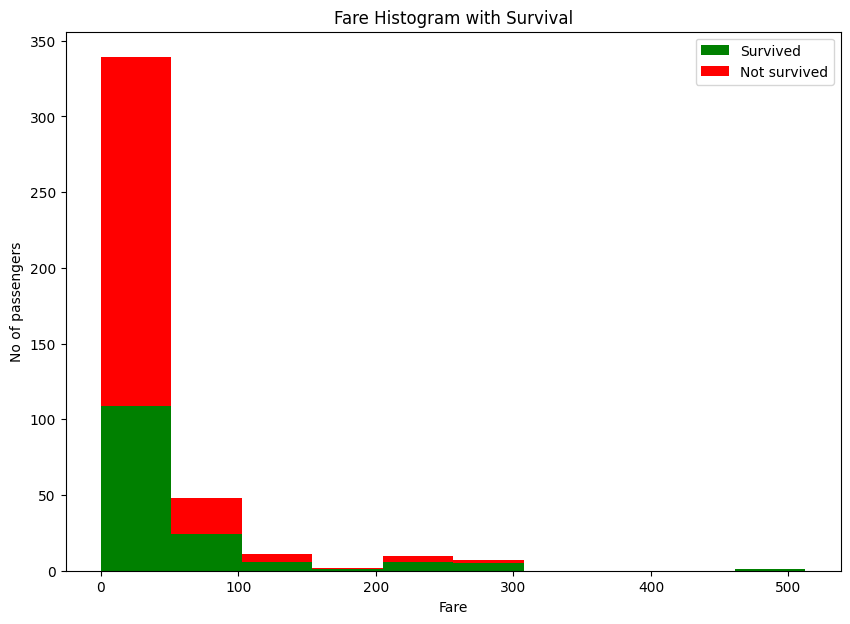

In [49]:
fig = plt.figure(figsize =(10, 7))
plt.hist(x = [df[df['Survived']==1]['Fare'], df[df['Survived']==0]['Fare']], stacked=True, color = ['g','r'],label = ['Survived','Not survived'])
plt.title('Fare Histogram with Survival')
plt.xlabel('Fare')
plt.ylabel('No of passengers')
plt.legend()

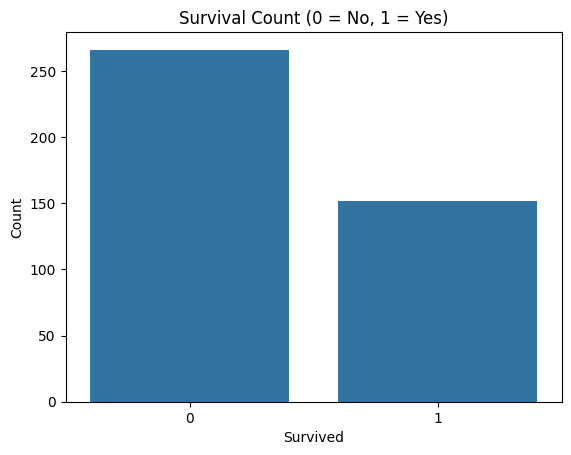

In [54]:
sns.countplot(x = 'Survived', data = df)
plt.xlabel('Survived')
plt.ylabel('Count')
plt.title('Survival Count (0 = No, 1 = Yes)')
plt.show()

# Spliting the data

In [55]:
x,y = df.drop(columns=['Survived']),df['Survived']

In [56]:
print(x.shape)
print(y.shape)

(418, 7)
(418,)


# Train_Test_Split

In [62]:
x_train,x_test,y_train,y_test =train_test_split(x,y , test_size=0.3)

In [63]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(292, 7)
(126, 7)
(292,)
(126,)


# Model Selection

In [76]:
regression = LogisticRegression(solver='liblinear', max_iter=200)

In [77]:
regression.fit(x_train,y_train)
y_pred = regression.predict(x_test)

In [78]:
accu = accuracy_score(y_pred, y_test)

In [80]:
accu*100      # accuracy in percentage

100.0